# Music Genre Classification - Exploratory Data Analysis (380K)

### Import necessary libraries

In [1]:
import string
import os
import math

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

In [3]:
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk.tokenize import RegexpTokenizer

In [4]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [5]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [6]:
# Parameters and definitions
RANDOM_SEED = 0
VAL_SET_SIZE = 0.2

In [7]:
np.random.seed(RANDOM_SEED)
sns.set(style="darkgrid")

### File Paths

In [8]:
DATASET = "../data/380000.csv"
FIGURES_DIR = "../figures/"

### Helper Methods

In [15]:
def load_data():
    """Loads the training and testing sets into the memory.
    """
    return pd.read_csv(DATASET, index_col=0)

### Data Wrangling

In [16]:
df = load_data()

### Exploratory Data Analysis

In [17]:
# Number of records
print("Len. of data set: {}".format(len(df)))

Len. of data set: 362237


In [18]:
# Summary Statistics
df.info() # Outcome: no missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362237 entries, 0 to 362236
Data columns (total 5 columns):
song      362235 non-null object
year      362237 non-null int64
artist    362237 non-null object
genre     362237 non-null object
lyrics    266557 non-null object
dtypes: int64(1), object(4)
memory usage: 16.6+ MB


In [19]:
# Summary Statistics (2)
df.describe()

,year
count,362237.000000
mean,2008.537596
std,9.908024
min,67.000000
25%,2006.000000
50%,2008.000000
75%,2014.000000
max,2038.000000


In [20]:
df.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [21]:
# Number of null entries in both datasets
print("Number of null entries in data set {}".format(df.isnull().sum()))

Number of null entries in data set song          2
year          0
artist        0
genre         0
lyrics    95680
dtype: int64


In [22]:
df.dropna(inplace=True)

In [23]:
# Different genres
print("Different genres in data set: {}".format(", ".join(df["genre"].unique())))

Different genres in data set: Pop, Hip-Hop, Not Available, Rock, Metal, Other, Country, Jazz, Electronic, Folk, R&B, Indie


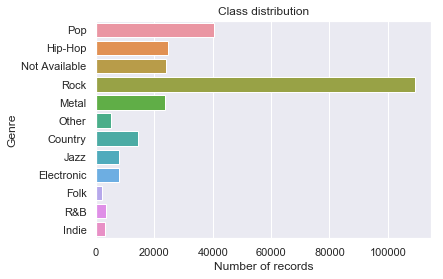

In [24]:
# Visualize different classes for data set
cntplot = sns.countplot(y="genre", data=df)
cntplot.set_title("Class distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Genre")
cntplot.get_figure().savefig(FIGURES_DIR+"1_class_dstr.pdf", bbox_inches="tight")

In [26]:
# Distribution in numbers
df['genre'].value_counts()

Rock             109235
Pop               40466
Hip-Hop           24850
Not Available     23941
Metal             23759
Country           14387
Jazz               7970
Electronic         7966
Other              5189
R&B                3401
Indie              3149
Folk               2243
Name: genre, dtype: int64

In [27]:
# In percentages
df['genre'].value_counts(normalize=True)

Rock             0.409801
Pop              0.151811
Hip-Hop          0.093226
Not Available    0.089816
Metal            0.089133
Country          0.053974
Jazz             0.029900
Electronic       0.029885
Other            0.019467
R&B              0.012759
Indie            0.011814
Folk             0.008415
Name: genre, dtype: float64

In [28]:
print("Number of unique artists on dataset: {}".format(len(set(df["artist"].values))))

Number of unique artists on dataset: 14543


In [29]:
print("Number of unique songs on dataset: {}".format(len(set(df["song"].values))))

Number of unique songs on dataset: 187186


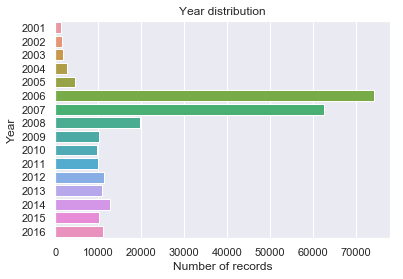

In [30]:
# Visualize different year ranges for data set
cntplot = sns.countplot(y="year", data=df[(df["year"] > 2000) & (df["year"] < 2017)])
cntplot.set_title("Year distribution")
cntplot.set_xlabel("Number of records")
cntplot.set_ylabel("Year")
cntplot.get_figure().savefig(FIGURES_DIR+"2_year_dstr.pdf", bbox_inches="tight")

In [32]:
# Year distribution
df['year'].value_counts(normalize=True)

2006    0.278579
2007    0.234705
2008    0.073564
2014    0.047904
2012    0.042389
2016    0.041661
2013    0.040652
2009    0.038183
2015    0.038101
2011    0.036912
2010    0.036563
2005    0.017430
2004    0.010204
2003    0.006445
2002    0.005744
2001    0.004562
2000    0.004517
1990    0.004277
1999    0.003898
1998    0.003050
1997    0.002922
1996    0.002896
1995    0.002776
1992    0.002412
1994    0.002277
1993    0.002135
1991    0.001152
1989    0.000990
1977    0.000960
1973    0.000923
1982    0.000923
1980    0.000762
1971    0.000747
1988    0.000732
1972    0.000720
1986    0.000717
1978    0.000709
1981    0.000705
1979    0.000702
1984    0.000683
1985    0.000653
1970    0.000645
1974    0.000604
1983    0.000551
1975    0.000548
1987    0.000476
1976    0.000315
112     0.000015
702     0.000004
1968    0.000004
67      0.000004
Name: year, dtype: float64

In [33]:
sorted(list(set(df["year"])))

[67,
 112,
 702,
 1968,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

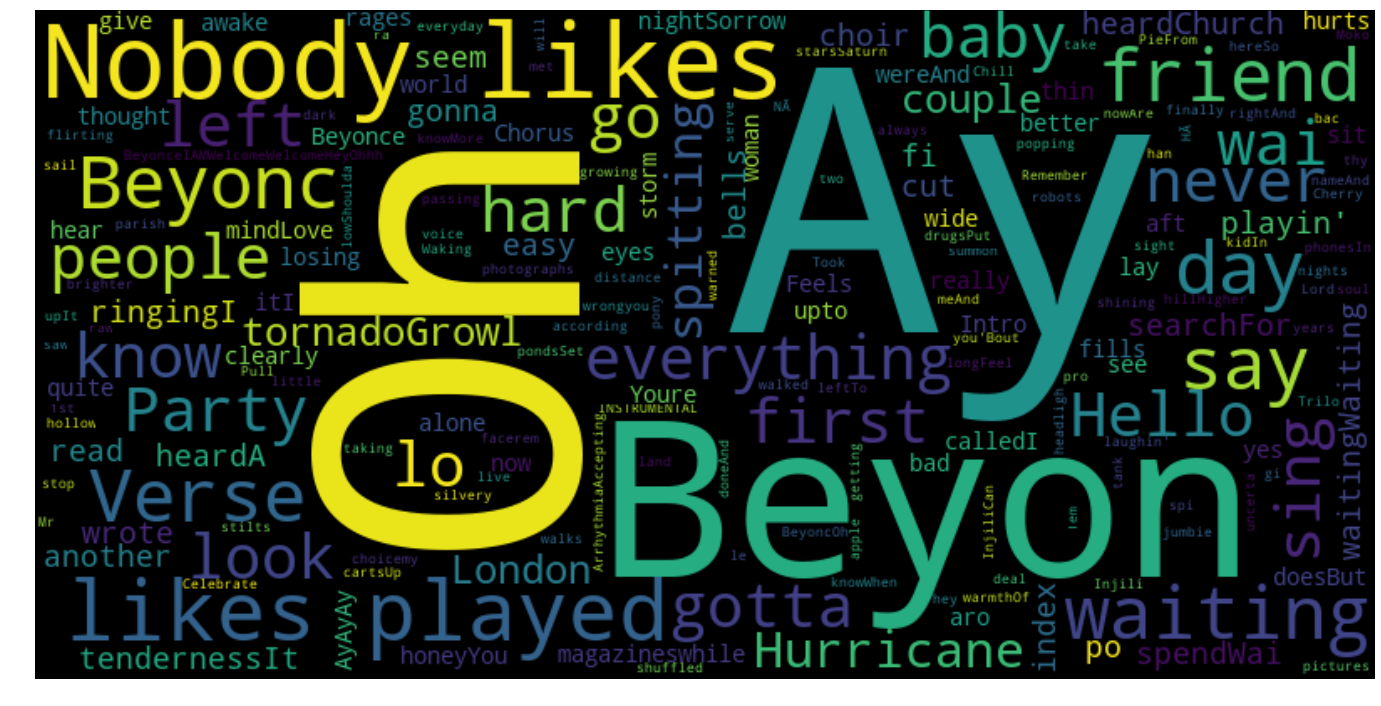

In [45]:
# Word Cloud (most frequently used words)
wc = WordCloud(random_state=0, max_words=200, width=800, height=400).generate(str(df["lyrics"].str.replace('\n','')))
plt.figure(figsize=(24,16))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(FIGURES_DIR+"3_wc.pdf", bbox_inches="tight")
plt.show()

## Load data set with combinatorial features

In [52]:
df = pd.read_csv("../data/380000_final.csv")
df.head()
df.dropna(inplace=True)

In [53]:
df.describe()

,year,parts,contr,slang,punct,symbols,digits,accents,custom,stop
count,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000,239988.000000
mean,2007.661129,0.483783,14.005334,2.833654,17.212181,9.084342,0.459777,0.040735,35.384915,102.392861
std,10.527171,2.095055,13.665894,5.837319,23.549035,27.961894,2.074101,0.197677,22.325384,73.583973
min,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,0.000000,4.000000,0.000000,3.000000,1.000000,0.000000,0.000000,21.000000,55.000000
50%,2007.000000,0.000000,10.000000,1.000000,9.000000,3.000000,0.000000,0.000000,31.000000,86.000000
75%,2010.000000,0.000000,20.000000,3.000000,23.000000,9.000000,0.000000,0.000000,44.000000,130.000000
max,2016.000000,139.000000,445.000000,363.000000,775.000000,2337.000000,224.000000,1.000000,1090.000000,3340.000000


In [58]:
print("Numnber of tags removed: {}".format(sum(df["parts"])))
print("Number of contractions expanded: {}".format(sum(df["contr"])))
print("Number of slang detected: {}".format(sum(df["slang"])))
print("Number of punctuation removed: {}".format(sum(df["punct"])))
print("Number of symbols removed: {}".format(sum(df["digits"])))
print("Number of accents fixed: {}".format(sum(df["accents"])))
print("Number of custom characters removed: {}".format(sum(df["custom"])))
print("Number of stop words removed: {}".format(sum(df["stop"])))
print("Total number of operations performed: {}".format(sum(df["parts"]) +
                                                       sum(df["contr"]) +
                                                       sum(df["slang"]) +
                                                       sum(df["punct"]) +
                                                       sum(df["digits"]) +
                                                       sum(df["accents"]) +
                                                       sum(df["custom"]) +
                                                       sum(df["stop"])))

Numnber of tags removed: 116102.0
Number of contractions expanded: 3361112.0
Number of slang detected: 680043.0
Number of punctuation removed: 4130717.0
Number of symbols removed: 110341.0
Number of accents fixed: 9776.0
Number of custom characters removed: 8491955.0
Number of stop words removed: 24573058.0
Total number of operations performed: 41473104.0


### Convert categorical column (genre) by performing One Hot Encoding (OHE)

In [59]:
dummies = pd.get_dummies(df['genre'], prefix = 'genre')
df = pd.concat([df, dummies], axis=1)
df.head()

,song,year,artist,genre,lyrics,parts,contr,slang,punct,symbols,...,genre_Folk,genre_Hip-Hop,genre_Indie,genre_Jazz,genre_Metal,genre_Not Available,genre_Other,genre_Pop,genre_R&B,genre_Rock
0,ego-remix,2009,beyonce-knowles,Pop,oh babi you know i go cut right chase some wom...,0.0,61.0,12.0,35.0,3.0,...,0,0,0,0,0,0,0,1,0,0
1,then-tell-me,2009,beyonce-knowles,Pop,play everyth easi like seem sure still way see...,0.0,14.0,6.0,32.0,4.0,...,0,0,0,0,0,0,0,1,0,0
2,honesty,2009,beyonce-knowles,Pop,if search for tender it hard find you love you...,0.0,9.0,1.0,2.0,4.0,...,0,0,0,0,0,0,0,1,0,0
3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh i oh oh oh i if i wrote book stand th...,6.0,31.0,37.0,27.0,2.0,...,0,0,0,0,0,0,0,1,0,0
4,black-culture,2009,beyonce-knowles,Pop,parti peopl peopl parti pop sit around i see l...,0.0,26.0,0.0,36.0,20.0,...,0,0,0,0,0,0,0,1,0,0


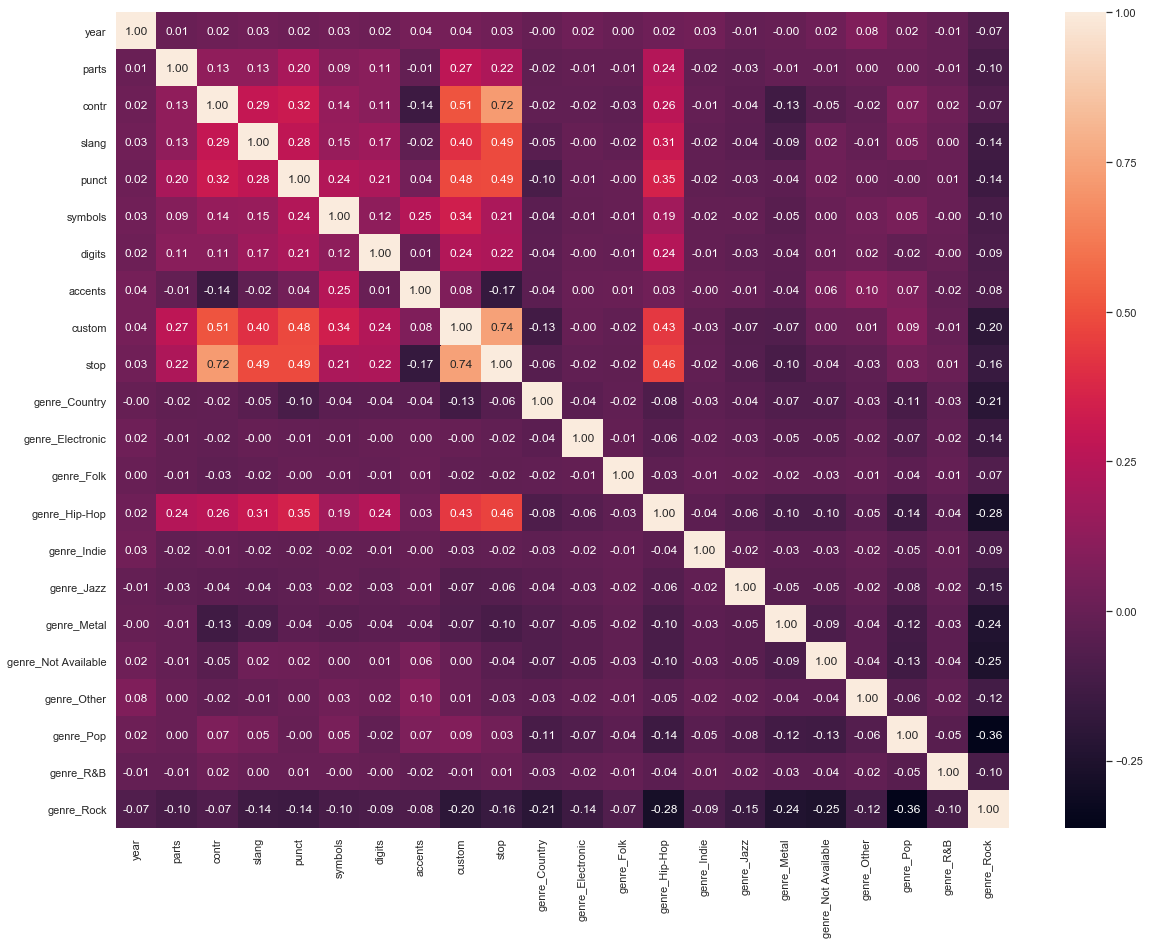

In [60]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize=(20,15))
ax = plt.subplot(111);
sns.heatmap(corr,
            fmt=".2f",
            annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax);
plt.savefig(FIGURES_DIR+"4_corr_mat.pdf", bbox_inches="tight")

In [ ]:
# import pandas as pd

# DATASET = "../data/380000_final.csv"

# # Load the data
# d = pd.read_csv(DATASET)
# d.dropna(axis=0, inplace=True)
# d = d[["genre", "lyrics"]]

In [ ]:
new = pd.read_csv("../data/songs_with_lyrics.csv")

In [ ]:
new["len"] = new["lyrics"].apply(len)

In [ ]:
# new.head()

In [ ]:
# new.shape[0]

In [ ]:
# new.dropna(inplace=True)

In [ ]:
# new.lyrics = new.lyrics.astype(str)

In [ ]:
# new.info()

In [ ]:
# # Visualize different classes for data set
# cntplot = sns.countplot(y="genre", data=new)
# cntplot.set_title("Class distribution")
# cntplot.set_xlabel("Number of records")
# cntplot.set_ylabel("Genre")
# cntplot.get_figure();

In [8]:
print("Number of different languages detected: {}".format(len(list(set(final["lang"].values)))))

Number of different languages detected: 32


In [9]:
print("Languages detected: {}".format(" ".join(list(set(final["lang"].values)))))

Languages detected: tr lv da vi es ca de ro et cy sk af fi cs sl en hr lt nl it fr sq sv sw id pl tl so UNKNOWN hu pt no


In [ ]:
print("Records with language other than EN: {}".format(len(final[final["lang"] != "en"])))